In [50]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
filename = "/HDD/global/global_all_20110101.nc"
path_fig = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures/'

nc_file = nc.Dataset(filename, "r")

keys = nc_file.variables.keys()
print(keys)

dict_keys(['longitude', 'latitude', 'time', 't2m', 'u10', 'v10', 'd2m', 'bcaod550', 'duaod550', 'lsm', 'msl', 'omaod550', 'pm10', 'pm1', 'pm2p5', 'ssaod550', 'suaod550', 'z', 'sp', 'aod1240', 'aod469', 'aod550', 'aod670', 'aod865', 'tcco', 'tc_c2h6', 'tchcho', 'tc_h2o2', 'tc_oh', 'tc_c5h8', 'tc_ch4', 'tc_hno3', 'tcno2', 'tc_no', 'gtco3', 'tc_pan', 'tc_c3h8', 'tcso2', 'tcwv'])


In [52]:
print(nc_file['duaod550'].long_name)
print(nc_file['omaod550'].long_name)
print(nc_file['ssaod550'].long_name)
print(nc_file['suaod550'].long_name)
print(nc_file['tc_ch4'].long_name)
print(nc_file['tcwv'].long_name)
print(nc_file['msl'].long_name)

Dust Aerosol Optical Depth at 550nm
Organic Matter Aerosol Optical Depth at 550nm
Sea Salt Aerosol Optical Depth at 550nm
Sulphate Aerosol Optical Depth at 550nm
Total column methane
Total column vertically-integrated water vapour
Mean sea level pressure


In [53]:
print(nc_file['pm2p5'].long_name)
print(nc_file['t2m'].long_name)
print(nc_file['u10'].long_name)
print(nc_file['v10'].long_name)
print(nc_file['z'].long_name)
print(nc_file['tcwv'].long_name)

Particulate matter d <= 2.5 um
2 metre temperature
10 metre U wind component
10 metre V wind component
Geopotential
Total column vertically-integrated water vapour


/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures/CorrAna.png


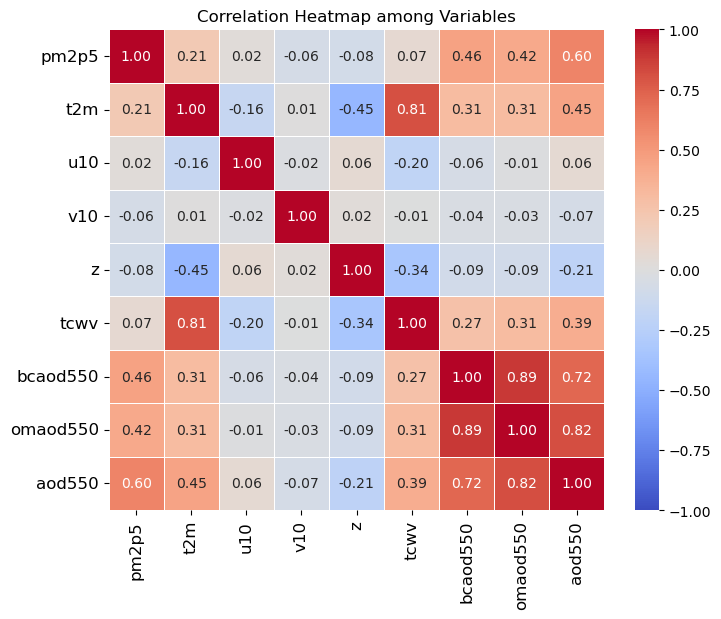

In [47]:
# Create a dictionary to store variable data
data_dict = {}

# Extract variable data
variables_list = ['pm2p5', 't2m', 'u10', 'v10', 'z', 'tcwv','bcaod550', 'omaod550', 'aod550']
# for variable_name in nc_file.variables:
for variable_name in variables_list:
    # Exclude dimension variables
    if variable_name not in nc_file.dimensions:
        data_dict[variable_name] = (nc_file.variables[variable_name][:]).flatten()

# Close the NetCDF file
nc_file.close()

# Create a DataFrame for correlation analysis
df = pd.DataFrame(data_dict)

# Calculate correlation matrix
correlation_matrix = df.corr()

figure_width_mm = 190
figure_height_mm = 160
# Convert mm to inches
figure_width_inches = figure_width_mm / 25.4
figure_height_inches = figure_height_mm / 25.4

# Create a heatmap using seaborn
fig = plt.figure(figsize=(figure_width_inches, figure_height_inches))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap among Variables', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

filename = path_fig+ 'CorrAna.png'
print(filename)
fig.savefig(filename, dpi=300)

plt.show()